## Basic Data Processing

In [ ]:
!pip install pyyaml==5.4.1 >1.txt
!pip install darts >1.txt
!pip uninstall matplotlib >1.txt
!pip install matplotlib==3.5.1>1.txt
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,  mean_absolute_percentage_error

In [ ]:
!gdown https://drive.google.com/uc?id=19PUxOIGx3H6BJsTVkmtjEQtZTmEgjZtz&export=download

Downloading...
From: https://drive.google.com/uc?id=19PUxOIGx3H6BJsTVkmtjEQtZTmEgjZtz
To: /content/Test Project Ercot.xlsx
100% 2.51M/2.51M [00:00<00:00, 166MB/s]


In [ ]:
#Lets load the data
df = pd.read_excel('/content/Test Project Ercot.xlsx',sheet_name='DataSet')

In [ ]:
#Lets take a sneak peak at the data
df.head()

,DATETIME,WZ_Coast (BIDCLOSE_LOAD_FORECAST),WZ_ERCOT (BIDCLOSE_LOAD_FORECAST),WZ_East (BIDCLOSE_LOAD_FORECAST),WZ_FarWest (BIDCLOSE_LOAD_FORECAST),WZ_North (BIDCLOSE_LOAD_FORECAST),WZ_NorthCentral (BIDCLOSE_LOAD_FORECAST),WZ_SouthCentral (BIDCLOSE_LOAD_FORECAST),WZ_Southern (BIDCLOSE_LOAD_FORECAST),WZ_West (BIDCLOSE_LOAD_FORECAST),...,ERCOT (PHYS_RESP_CAP),ERCOT (RT_OR_PRADDER),ERCOT (RT_ORD_PRADDER),HOURENDING,MARKETDAY,PEAKTYPE,MONTH,YEAR,day,month
0,2021-10-01 01:00:00,12561.2998,44284.1723,1563.5500,4122.7598,990.903,13124.0996,6972.5601,3764.7800,1184.2200,...,4011.697479,0.0,0.0,1,2021-10-01,NaN,OCTOBER,2021,1,10
1,2021-10-01 02:00:00,12121.9004,42211.7866,1496.6801,4150.8301,959.826,12235.0000,6609.7998,3556.0701,1081.6801,...,3898.512676,0.0,0.0,2,2021-10-01,NaN,OCTOBER,2021,1,10
2,2021-10-01 03:00:00,11880.7998,40930.9753,1460.0500,4185.7202,911.155,11717.4004,6349.7798,3408.8401,1017.2300,...,3696.930362,0.0,0.0,3,2021-10-01,NaN,OCTOBER,2021,1,10
3,2021-10-01 04:00:00,11721.0000,39958.7655,1443.0300,4180.7700,864.553,11424.5996,6046.1099,3359.5300,919.1730,...,3701.126761,0.0,0.0,4,2021-10-01,NaN,OCTOBER,2021,1,10
4,2021-10-01 05:00:00,11886.0996,40038.8292,1425.2200,4144.7998,882.386,11400.2998,6054.2700,3295.7500,950.0040,...,3608.857542,0.0,0.0,5,2021-10-01,NaN,OCTOBER,2021,1,10


In [ ]:
#Lets see the dataset shape
df.values.shape

(4272, 65)

In [ ]:
#Lets remove some redundant features
df.drop('MARKETDAY',axis=1,inplace=True) #Already captured
df.drop('MONTH',axis=1,inplace=True)     #Already captured
df.drop('PEAKTYPE',axis=1,inplace=True)  #Empty
df.drop('DATETIME',axis=1,inplace=True)  #Already captured
df.drop('YEAR',axis=1,inplace=True)      #No point taking this as a feature

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4272 entries, 0 to 4271
Data columns (total 60 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   WZ_Coast (BIDCLOSE_LOAD_FORECAST)         4272 non-null   float64
 1   WZ_ERCOT (BIDCLOSE_LOAD_FORECAST)         4272 non-null   float64
 2   WZ_East (BIDCLOSE_LOAD_FORECAST)          4272 non-null   float64
 3   WZ_FarWest (BIDCLOSE_LOAD_FORECAST)       4272 non-null   float64
 4   WZ_North (BIDCLOSE_LOAD_FORECAST)         4272 non-null   float64
 5   WZ_NorthCentral (BIDCLOSE_LOAD_FORECAST)  4272 non-null   float64
 6   WZ_SouthCentral (BIDCLOSE_LOAD_FORECAST)  4272 non-null   float64
 7   WZ_Southern (BIDCLOSE_LOAD_FORECAST)      4272 non-null   float64
 8   WZ_West (BIDCLOSE_LOAD_FORECAST)          4272 non-null   float64
 9   GR_COASTAL (WIND_STWPF_BIDCLOSE)          4272 non-null   float64
 10  GR_NORTH (WIND_STWPF_BIDCLOSE)      

In [ ]:
#As seen before, we have a couple of null values. If the null values were about ~10% data, replacing them with mean
#or median, while adding a new column to indicate artificial injunction would have been preferred. Other methods
#such as MICE (Multiple Imputation by Chained Equation) could have been done. However, since there are only a few
#null values, we can drop them all.
df.dropna(axis=0,how='any',inplace=True)

In [ ]:
df.values.shape
#cleary the loss of data is minimal

(4218, 60)

In [ ]:
#Lets separate out the variables
y_real=df[['HB_NORTH (RTLMP)']]
y_ahead=df[['HB_NORTH (DALMP)']]

In [ ]:
X=df.drop(['HB_HOUSTON (RTLMP)','HB_NORTH (RTLMP)','HB_PAN (RTLMP)','HB_SOUTH (RTLMP)','HB_WEST (RTLMP)',
           'HB_HOUSTON (DALMP)','HB_NORTH (DALMP)','HB_PAN (DALMP)','HB_SOUTH (DALMP)','HB_WEST (DALMP)'],axis=1)

## Exploratory Data Analysis

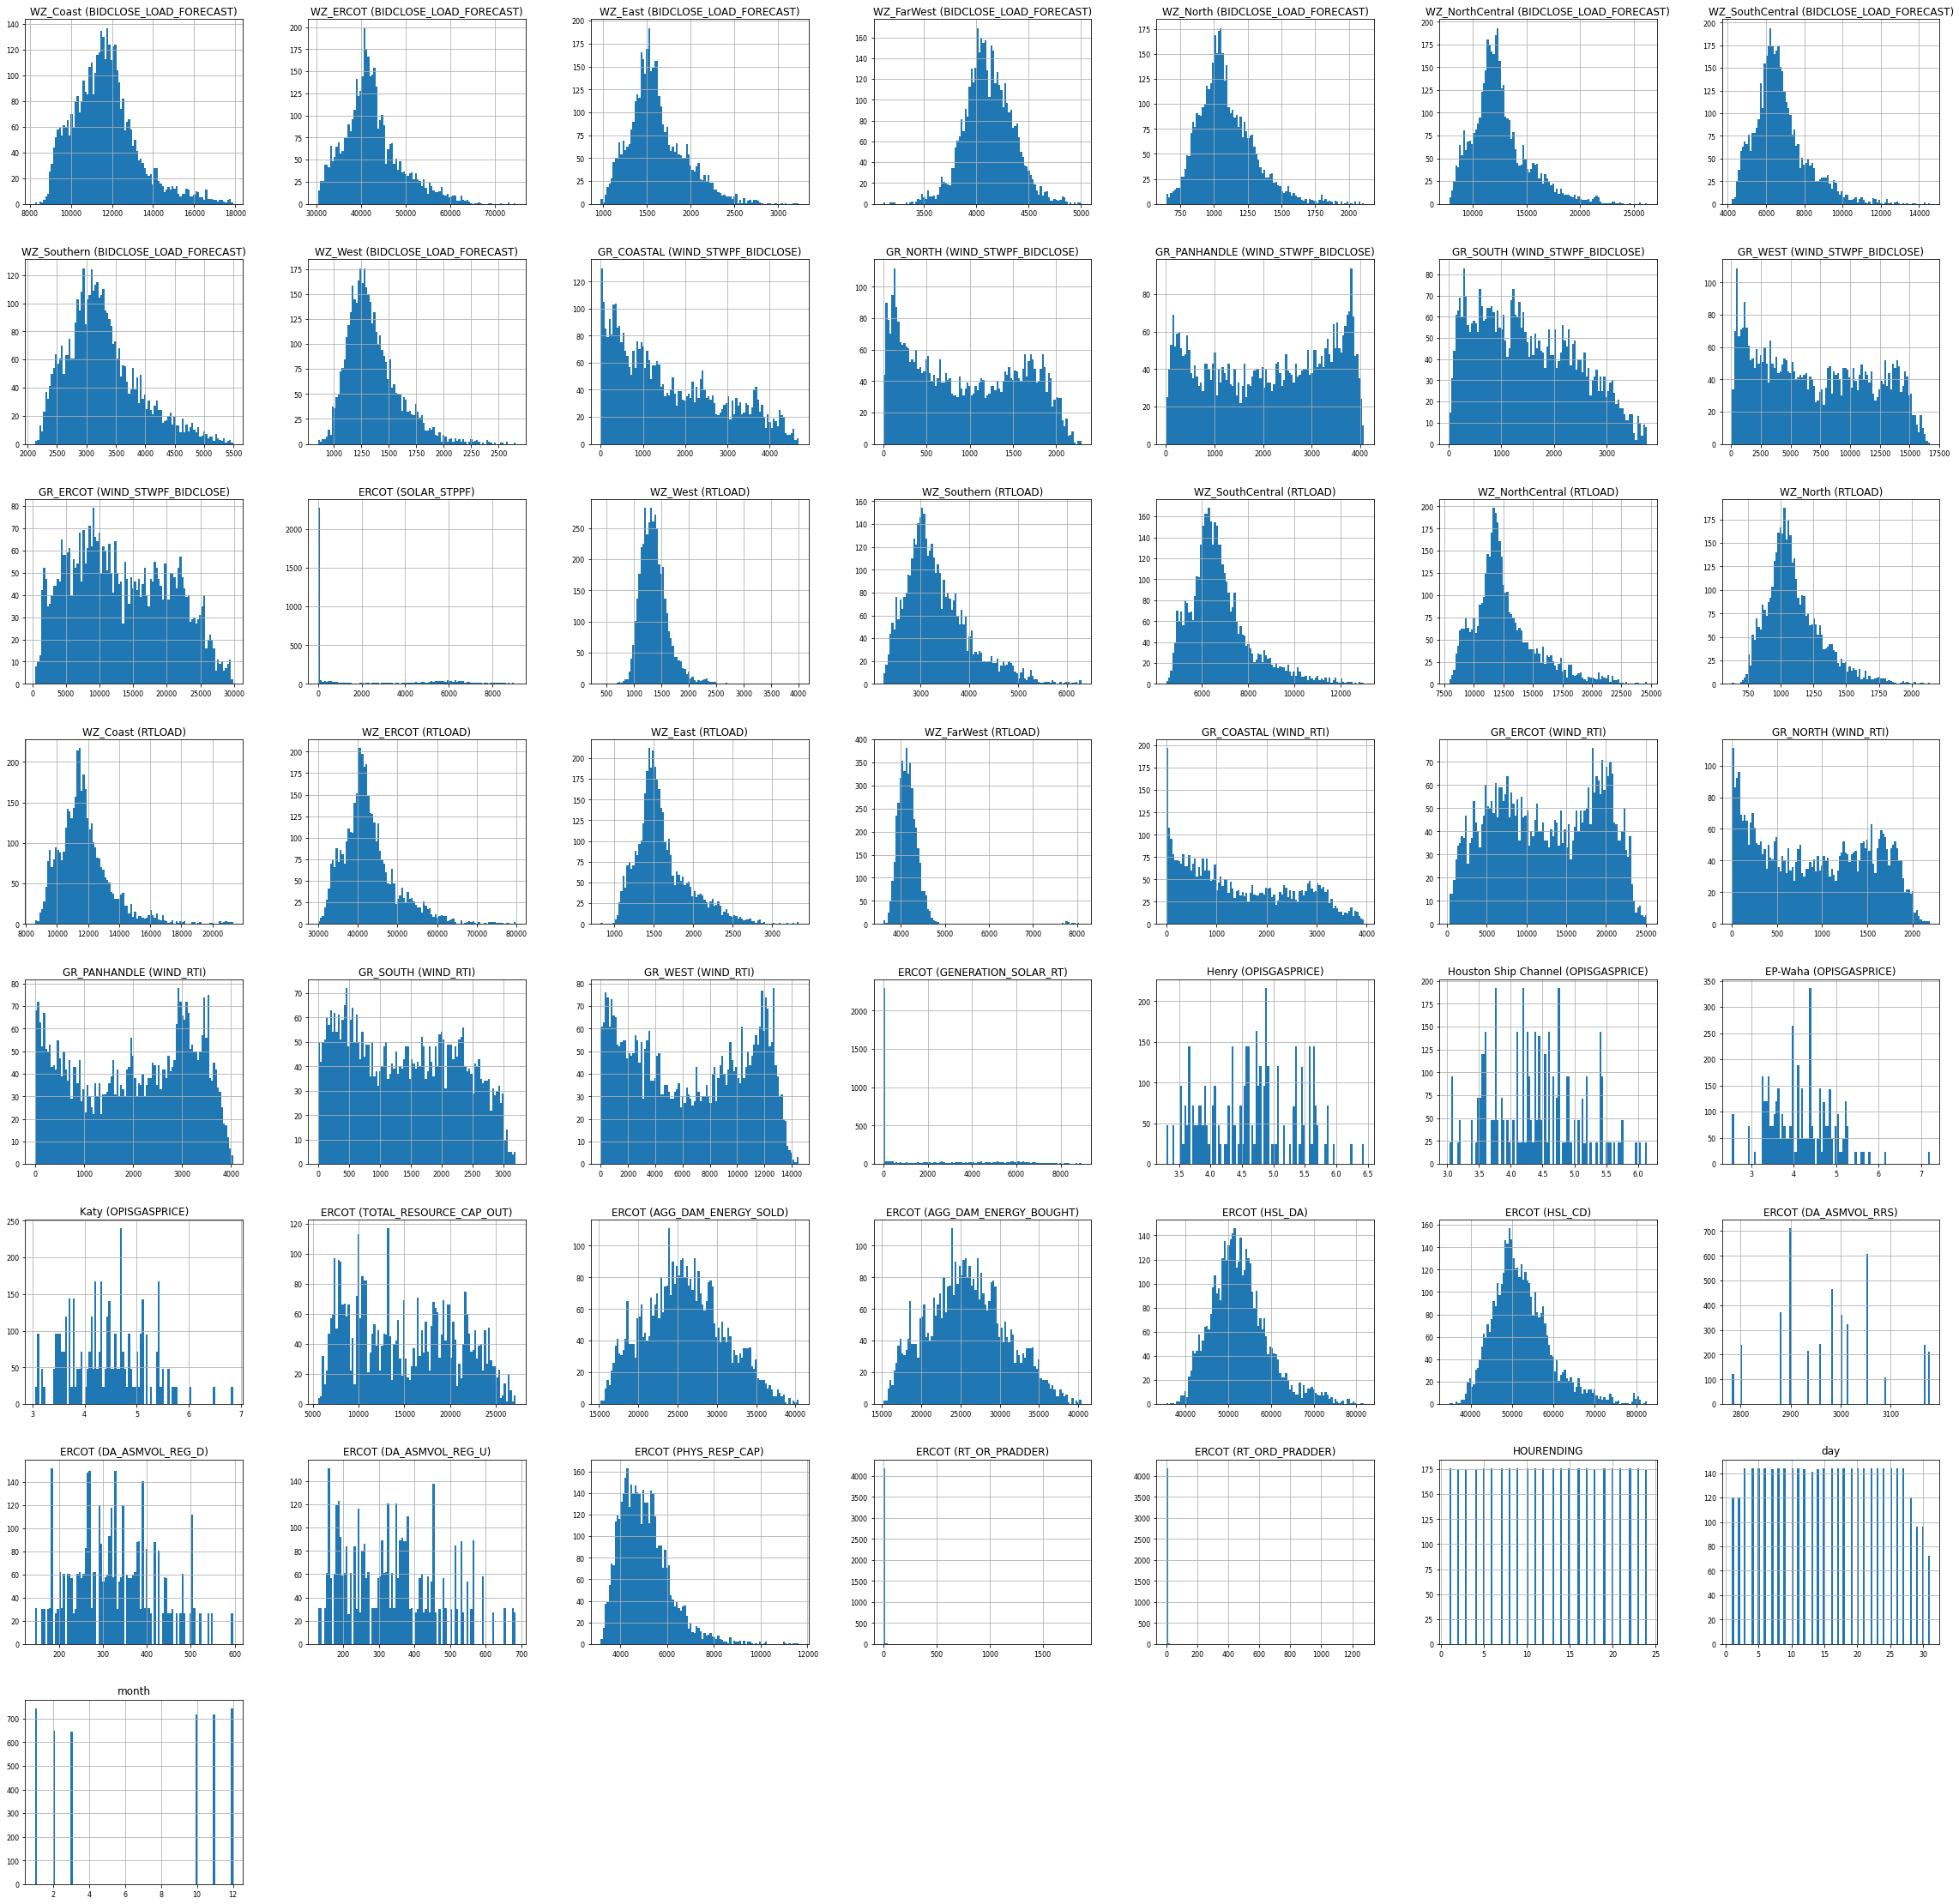

In [ ]:
#Lets plot the histograms of our features to see if we can find out any special characteristics
X.hist(figsize=(40, 40), bins=100, xlabelsize=8, ylabelsize=8);

In [ ]:
#Insights:
# 1. Solar forecast and actual solar is 0 most of the times- makes since since there often clouds + nights everyday
# 2. Data is well distributed amongst days of month and time of day but only have data for October to March
# 3. ORDC i.e. the automatic increase in price of power when reserves are low is as expected mostly zero
# 4. All other features seem to be well distributed

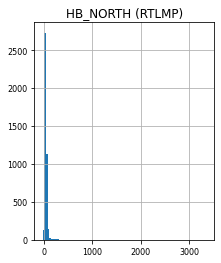

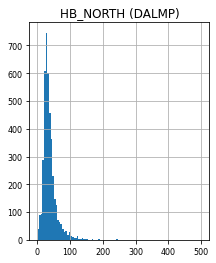

In [ ]:
#Lets check the distribution of prices now
y_real.hist(figsize=(20, 4), bins=100, xlabelsize=8, ylabelsize=8, layout = (1,5));
y_ahead.hist(figsize=(20, 4), bins=100, xlabelsize=8, ylabelsize=8, layout = (1,5));

In [ ]:
#Insights:
# 1. Actual prices are more sharply concentrated than actually predicted via DayAhead Price. Indeed they arent even
# centered similarly. Hence theres a tendency to overestimate prices in DayAhead Price.

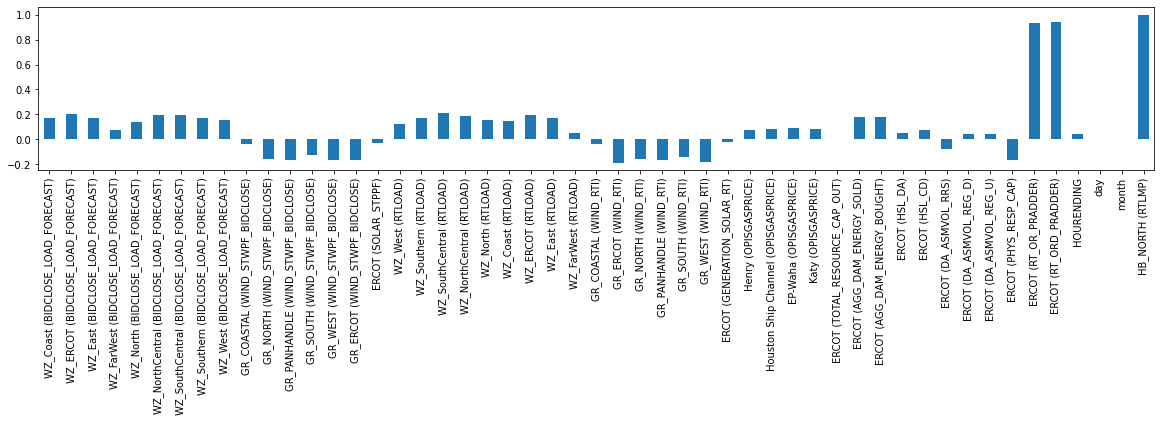

In [ ]:
#Lets check out correlations of features with the price for 'HB_NORTH (RTLMP)'
corr=pd.concat([X,y_real],axis=1).corr()['HB_NORTH (RTLMP)']
corr.plot(kind='bar',figsize=(20,3))

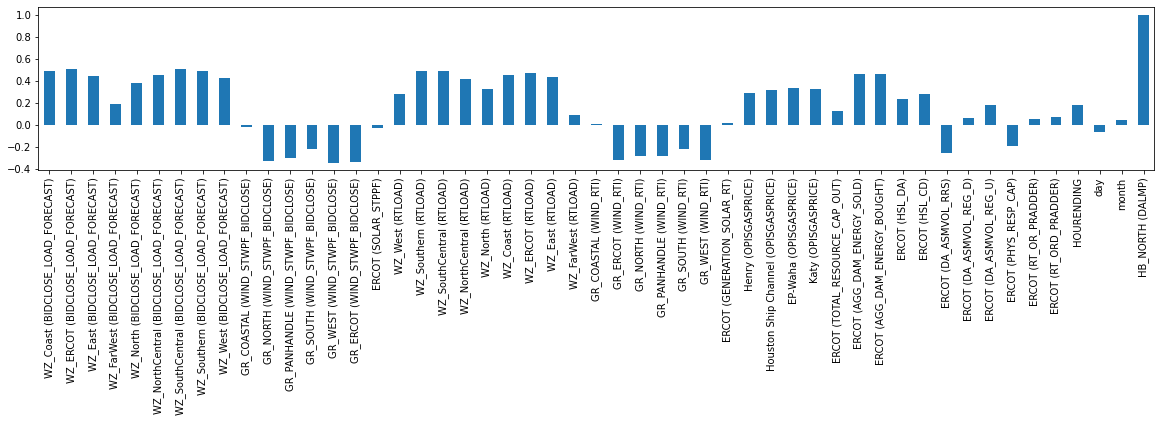

In [ ]:
#similarly for 'HB_NORTH (DALMP)'
corr=pd.concat([X,y_ahead],axis=1).corr()['HB_NORTH (DALMP)']
corr.plot(kind='bar',figsize=(20,3))

In [ ]:
#Insights:
# 1. The sign of correlation between the features and the two prices have the same signs. So its clear which
# features correlate positively/negatively with both the prices.
# 2. The ORDC features correlate very positively with real time prices but not so much with day ahead. (why?)

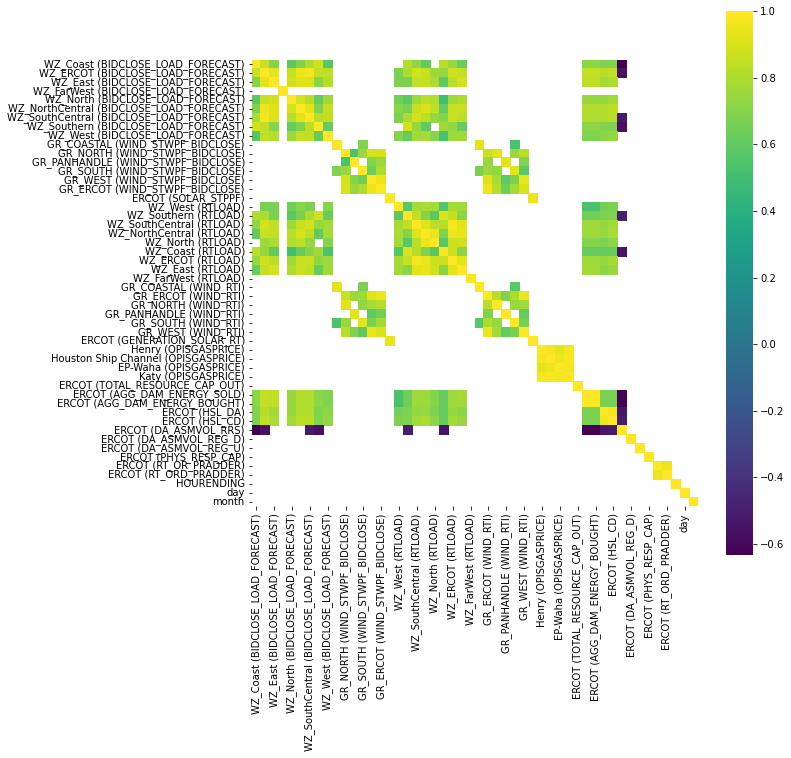

In [ ]:
#Lets see feature correlation now. Will plot correlations with abs value >= 0.5
corr= X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr[(corr>=0.5)|(corr<=-0.5)],cmap='viridis',square= True)

In [ ]:
#Insights:
# 1. The Demand Regional Forecasts for diff. regions are highly correlated amongst each other EXCEPT far-west region
# 2. Demand Regionals are also highly correlated with actual demands except far-west region
# 3. The wind forecasts for different regions are highly correlated with each other and with the actual wind
# 4. DaAhead energy sold/bought, sustainibility limits are highly correlated amongst each other and with actual
# and with actual & forecasted energy demands
# 5. DA responsive reserves are negatively correlated with most demands and their predictions

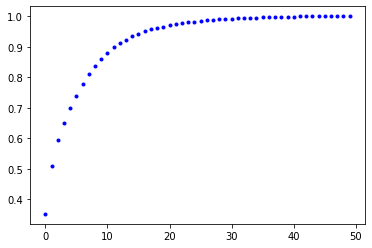

In [ ]:
#Lets check out PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sc = StandardScaler()
pca = PCA(n_components=50)
X_scaled = pd.DataFrame(sc.fit_transform(X),index=X.index,columns=X.columns)
pca.fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_),'b.')

In [ ]:
# PCA shows that we can explain about 90% data variance using only the first 10 principal components and
# about 95% using the first 20 principal components- PCA is definitely a good idea

[]

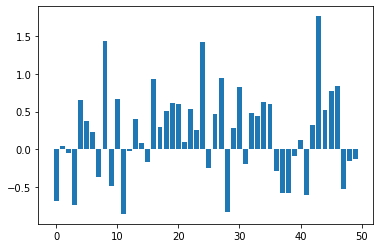

In [ ]:
#Lets figure out relative importance of our features by comparing the weights given to them by first 20 p.componenets
cmpts = pca.components_[:20,:].sum(axis=0)

plt.bar([i for i in range(50)],cmpts)
plt.plot()

In [ ]:
#scaling y
sc1 = StandardScaler()
y_real_scaled = pd.DataFrame(sc1.fit_transform(np.array(y_real).reshape(-1,1)),index=y_real.index)

## Linear Regression

In [ ]:
#Some helper functions
months=[10,11,12,1,2,3]
months_scaled = X_scaled['month'].unique().tolist()

months_name=['Oct','Nov','Dec','Jan','Feb','Mar']

def evaluate(months, regressor, X, y, y_scaled=False,scaler=None, X_pca=None):
    if y_scaled:
        assert scaler is not None
    X_=None
        
    MSE_train=[]
    MSE_test=[]
    MAE_train=[]
    MAE_test=[]
    
    for month in months:
        if X_ is not None:
            X=X_
        
        ind_test = X.index[abs(X['month']-month)<=10e-3].tolist()
        ind_train = X.index[abs(X['month']-month)>10e-3].tolist()
        
        if X_pca is not None:
            X_=X
            X=X_pca
        
        X_train, X_test, y_train, y_test = X.loc[ind_train], X.loc[ind_test], y.loc[ind_train], y.loc[ind_test]
        
        regressor.fit(X_train,y_train)
        
        y_pred_train=regressor.predict(X_train)
        y_pred=regressor.predict(X_test)
        
        
        if y_scaled:
            y_train=scaler.inverse_transform(y_train)
            y_test = scaler.inverse_transform(y_test)
            y_pred_train = scaler.inverse_transform(y_pred_train)
            y_pred = scaler.inverse_transform(y_pred)
            
            
        MSE_train.append(round(mean_squared_error(y_train,y_pred_train),2))
        MAE_train.append(round(mean_absolute_error(y_train,y_pred_train),2))
        MSE_test.append(round(mean_squared_error(y_test,y_pred),2))
        MAE_test.append(round(mean_absolute_error(y_test,y_pred),2))
        
    plt.plot(months_name,MSE_train,label='MSE train')
    plt.plot(months_name,MAE_train,label='MAE train')
    plt.plot(months_name,MSE_test,label='MSE test')
    plt.plot(months_name,MAE_test,label='MAE test')
    plt.legend()
    plt.show()
    print('MSE_train',MSE_train, 'avg:', round(sum(MSE_train)/len(MSE_train),2))
    print('MSE_test',MSE_test,'avg:', round(sum(MSE_test)/len(MSE_train),2))
    print('MAE_train',MAE_train,'avg:', round(sum(MAE_train)/len(MSE_train),2))
    print('MAE_test',MAE_test,'avg:', round(sum(MAE_test)/len(MSE_train),2))
    

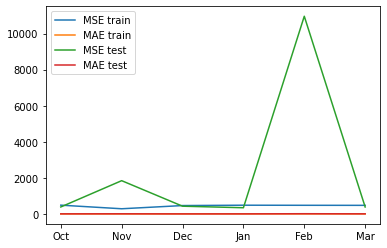

MSE_train [492.68, 293.3, 470.38, 490.2, 485.38, 482.27] avg: 452.37
MSE_test [392.36, 1849.25, 435.17, 350.01, 10958.52, 391.61] avg: 2396.15
MAE_train [9.14, 7.58, 9.3, 9.32, 9.25, 8.87] avg: 8.91
MAE_test [11.41, 15.08, 9.22, 10.74, 18.89, 12.25] avg: 12.93


In [ ]:
#Lets finally do our linear regression
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
evaluate(months,reg,X,y_real)

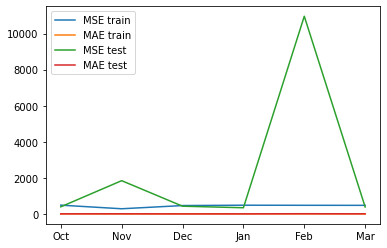

MSE_train [492.78, 293.3, 470.38, 490.21, 485.38, 482.27] avg: 452.39
MSE_test [401.0, 1849.25, 435.17, 349.48, 10958.52, 391.61] avg: 2397.5
MAE_train [9.18, 7.58, 9.3, 9.31, 9.25, 8.87] avg: 8.91
MAE_test [11.9, 15.08, 9.22, 10.71, 18.89, 12.25] avg: 13.01


In [ ]:
# with scaled features
reg1 = LinearRegression()
evaluate(months_scaled,reg1,X_scaled,y_real_scaled, y_scaled=True, scaler= sc1)

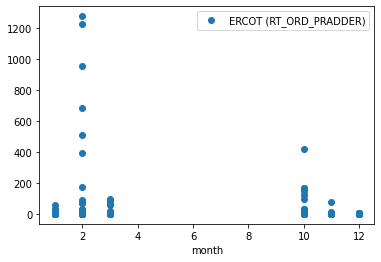

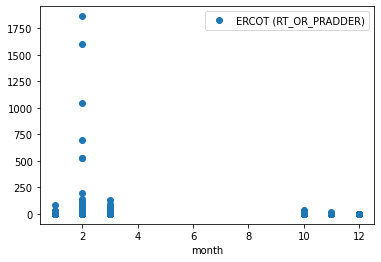

In [ ]:
# Whats happeing here? Why NOT training on february (but) testing on it is leading to sooo high errors?
# I checked all the feature vs month plots and found that it has to do with the ORDC features -ERCOT (RT_OR_PRADDER)
# and ERCOT (RT_ORD_PRADDER)

df.plot(x='month',y='ERCOT (RT_ORD_PRADDER)',style='o')
df.plot(x='month',y='ERCOT (RT_OR_PRADDER)',style='o')

#these two features mainly spike during february only and hence not training on Feb leads to very very bad results
# on testing on Feb

#This also highlights the relative importance of months when it comes to information contained in them- clearly not
# training on october/december/january is not as bad as not training on nov/feb.

MSE= 461.481452440294 MAE= 9.023105391989736


[]

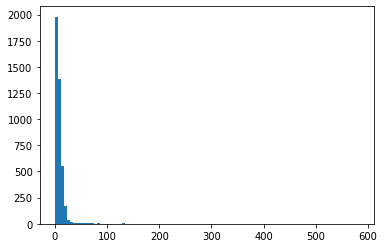

In [ ]:
#Lets just see how much error we get on training on the entire data
reg_full = LinearRegression()
reg_full.fit(X,y_real)
pred=reg_full.predict(X)
print('MSE=',mean_squared_error(y_real,pred),'MAE=', mean_absolute_error(y_real,pred))

#Lets see the absolute error distribution
plt.hist(abs(np.array(y_real)-pred),bins=100)
plt.plot()
# This shows us mostly we have low errors but we there a couple of very very high error points - theres a 582 std error point as well

In [ ]:
#and with scaling:
reg_full = LinearRegression()
reg_full.fit(X_scaled,y_real_scaled)
pred=reg_full.predict(X_scaled)
print('MSE=',mean_squared_error(y_real,sc1.inverse_transform(pred)),'MAE=', mean_absolute_error(y_real,sc1.inverse_transform(pred)))
#not much difference

MSE= 461.48145244018946 MAE= 9.023105391933187


## Support Vector Regression

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

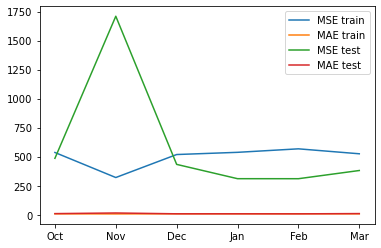

MSE_train [535.93, 320.12, 518.26, 537.25, 567.38, 524.74] avg: 500.61
MSE_test [485.5, 1709.98, 433.29, 310.09, 309.91, 380.55] avg: 604.89
MAE_train [7.26, 6.5, 7.7, 7.72, 7.89, 7.3] avg: 7.4
MAE_test [9.13, 14.58, 7.49, 7.55, 7.15, 9.45] avg: 9.22


In [ ]:
from sklearn import svm
svr1= svm.SVR(kernel='poly',degree=1,C=1,gamma='scale',epsilon=0.05)
evaluate(months_scaled,svr1,X_scaled,y_real_scaled, y_scaled=True, scaler= sc1)

In [ ]:
#Insights:
# 1. Linear kernel or poly kernel with degree 1 seems to be the best in unseen time testing. My conjecture is that this
# is happening because higher deg polynomials and rgf kernels are overfitting badly on the training set- leading to
# super high test error for the month of February.

# Lets try out what we can do with the entire dataset

In [ ]:
#and with scaling:
svr2=svm.SVR(kernel='poly',degree=2,C=20,gamma='scale',epsilon=0.05)
svr2.fit(X_scaled,y_real_scaled)
pred=svr2.predict(X_scaled)
print('MSE=',mean_squared_error(y_real,sc1.inverse_transform(pred)),'MAE=', mean_absolute_error(y_real,sc1.inverse_transform(pred)))
#the point here is that we can make our svm to fit as tightly as possible by increasing C and decreasing epsilon

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MSE= 464.8361884617779 MAE= 6.931258108134784


## Nearest Neighbour Regressor

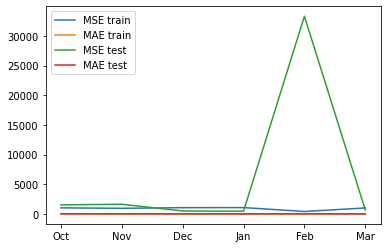

MSE_train [1029.6, 948.06, 1060.94, 1072.89, 415.36, 1013.8] avg: 923.44
MSE_test [1525.06, 1637.94, 495.14, 460.39, 33317.25, 678.28] avg: 6352.34
MAE_train [6.42, 6.06, 6.84, 6.84, 6.02, 6.31] avg: 6.42
MAE_test [17.93, 14.0, 9.43, 8.26, 25.12, 12.26] avg: 14.5


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5,weights='uniform',algorithm='kd_tree',p=2,metric='minkowski')
evaluate(months_scaled,knn,X_scaled,y_real_scaled, y_scaled=True, scaler= sc1)

In [ ]:
#Insights:
# Not a great method: errors are high for any meaningful number of neighbours- i.e. overfitting badly.

# HOWEVER! 50 dim might be a high dimensional space and 4700 examples are too few! Lets see what happens if we move to the princiap component space of
# 20 dimensions

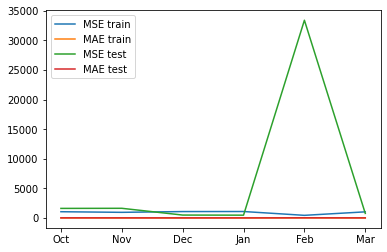

MSE_train [1052.66, 949.13, 1079.3, 1087.01, 442.7, 1031.71] avg: 940.42
MSE_test [1614.24, 1631.14, 488.63, 471.15, 33410.01, 769.46] avg: 6397.44
MAE_train [6.58, 6.17, 7.0, 6.98, 6.17, 6.43] avg: 6.56
MAE_test [18.46, 13.97, 9.3, 8.56, 25.5, 12.34] avg: 14.69


In [ ]:
pca1 = PCA(n_components=20)
pca1.fit(X_scaled)
Xpca=pd.DataFrame((pca1.components_@X_scaled.T).T,index=X.index)
evaluate(months_scaled,knn,X_scaled,y_real_scaled,y_scaled=True,scaler=sc1,X_pca=Xpca)
# The results suggest that the method wasnt suffereing from curse of dimensionality and the tradeoff of losing some information due to 20 components
# wasnt worth it

## Random Forest Regressor

/var/folders/7c/yl6c778x3jq_k3nzf47hb5fh0000gn/T/ipykernel_31899/2288193715.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
/var/folders/7c/yl6c778x3jq_k3nzf47hb5fh0000gn/T/ipykernel_31899/2288193715.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
/var/folders/7c/yl6c778x3jq_k3nzf47hb5fh0000gn/T/ipykernel_31899/2288193715.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
/var/folders/7c/yl6c778x3jq_k3nzf47hb5fh0000gn/T/ipykernel_31899/2288193715.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

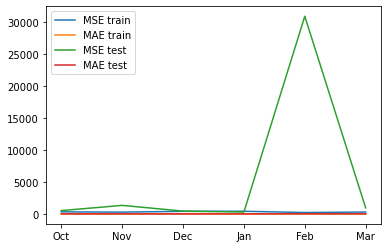

MSE_train [330.11, 286.92, 412.85, 422.5, 225.05, 301.04] avg: 329.74
MSE_test [526.97, 1342.43, 447.43, 304.27, 30933.31, 953.11] avg: 5751.25
MAE_train [8.71, 8.97, 10.29, 10.11, 7.97, 9.02] avg: 9.18
MAE_test [14.12, 14.82, 11.23, 7.61, 24.49, 18.64] avg: 15.15


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=40,max_depth=5)
evaluate(months,rfr,X,y_real) #Tree based classifier dont need scaling

In [ ]:
#Lets just see how much error we get on training on the entire data
rfr1 = RandomForestRegressor(n_estimators=80,max_depth=5)
rfr1.fit(X,y_real)
pred=rfr1.predict(X)
print('MSE=',mean_squared_error(y_real,pred),'MAE=', mean_absolute_error(y_real,pred))

/var/folders/7c/yl6c778x3jq_k3nzf47hb5fh0000gn/T/ipykernel_31899/3699400474.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr1.fit(X,y_real)


MSE= 357.9492850784268 MAE= 9.557219176261599


In [ ]:
#Insights:
# 1. Everytime the above cell is run- MSE varies wildly- even with 80 estimators! Th reason is probably because
# some data points (February) are very important and they might or might not be picked up by majority regressors
# due to randomized boostrap sampling from the dataset- whenever they are picked up- low MSE, otherwise high
# 2. This also suggest that Adaptive Boosting might be a very good idea for this dataset- especially beacuse it 
# serially adds predictors to improve on the dataset- hence it'll probably have a different predictor for Feb examples

## XGBoost

[06:54:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:55:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:55:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:55:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:55:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:55:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


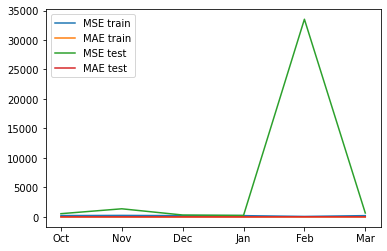

MSE_train [231.36, 260.95, 220.53, 220.67, 89.21, 222.09] avg: 207.47
MSE_test [552.93, 1381.36, 329.41, 258.99, 33518.5, 667.99] avg: 6118.2
MAE_train [5.72, 6.01, 6.22, 6.26, 5.07, 5.85] avg: 5.86
MAE_test [12.11, 13.73, 9.72, 6.5, 22.88, 15.82] avg: 13.46


In [ ]:
import xgboost
model = xgboost.XGBRegressor(n_estimators=40, max_depth=5, eta=0.1, subsample=0.7,reg_lambda=1)
evaluate(months,model,X,y_real)

In [ ]:
#Lets just see how much error we get on training on the entire data
model2 =xgboost.XGBRegressor(n_estimators=40, max_depth=5, eta=0.1, subsample=0.7,reg_lambda=1)
model2.fit(X,y_real)
pred=model2.predict(X)
print('MSE=',mean_squared_error(y_real,pred),'MAE=', mean_absolute_error(y_real,pred))

[06:55:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE= 216.18193859769406 MAE= 6.068631822680794


In [ ]:
# The MSE is definitely much better (about half) and the MAE has also improved. But is this a good method? How do we say that we are overfitting?
# We saw that a random forest with same number of estimators and max_depth could not fit the model well. This in a way signals that model complexoty
# is not too high. Essentially XGB is able to achieve much better results with almost the same model complexity (few more params) via adaptive boosting

# HOWEVER, one of the biggest concerns with XGBOOST is that its often a hit and miss. RN since theres no good way to validate- its hard to put faith
# in the model. This is especially because the decision boundaries of XGB are NOT smooth and very very brittle (wrt noise).

## Neural Network

###Utils

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader

dev=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
#Modified helper functions
months=[10,11,12,1,2,3]
months_scaled = X_scaled['month'].unique().tolist()

months_name=['Oct','Nov','Dec','Jan','Feb','Mar']

def evaluateNN(months, X, y, y_scaled=False,scaler=None,aug=False,X_original=None,y_original=None,input_dim=50):
    if y_scaled:
        assert scaler is not None
    if aug:
        assert X_original is not None
        assert y_original is not None
        
    MSE_train=[]
    MSE_test=[]
    MAE_train=[]
    MAE_test=[]
    
    for month in months:
        network = MyDNN(input_dim)
        network=network.to(dev)
        trainer = MyDNNTrain(network)
        
        
        ind_test = X.index[abs(X['month']-month)<=10e-3].tolist()
        ind_train = X.index[abs(X['month']-month)>10e-3].tolist()
 
        X_train, X_test, y_train, y_test = np.array(X.loc[ind_train]), np.array(X.loc[ind_test]), np.array(y.loc[ind_train]), np.array(y.loc[ind_test])

        if aug:
            ind_original_test = X_original.index[abs(X_original['month']-month)<=10e-3].tolist()
            X_test = np.array(X_original.loc[ind_original_test])
            y_test = np.array(y_original.loc[ind_original_test])

        trainer.train(y_train,X_train)
        
        with torch.no_grad():
            y_pred_train=network.predict(X_train)
            y_pred=network.predict(X_test)
            
            
            if y_scaled:
                y_train=scaler.inverse_transform(y_train)
                y_test = scaler.inverse_transform(y_test)
                y_pred_train = scaler.inverse_transform(y_pred_train)
                y_pred = scaler.inverse_transform(y_pred)
                
                
            MSE_train.append(round(mean_squared_error(y_train,y_pred_train),2))
            MAE_train.append(round(mean_absolute_error(y_train,y_pred_train),2))
            MSE_test.append(round(mean_squared_error(y_test,y_pred),2))
            MAE_test.append(round(mean_absolute_error(y_test,y_pred),2))
        
    plt.plot(months_name,MSE_train,label='MSE train')
    plt.plot(months_name,MAE_train,label='MAE train')
    plt.plot(months_name,MSE_test,label='MSE test')
    plt.plot(months_name,MAE_test,label='MAE test')
    plt.legend()
    plt.show()
    print('MSE_train',MSE_train, 'avg:', round(sum(MSE_train)/len(MSE_train),2))
    print('MSE_test',MSE_test,'avg:', round(sum(MSE_test)/len(MSE_train),2))
    print('MAE_train',MAE_train,'avg:', round(sum(MAE_train)/len(MSE_train),2))
    print('MAE_test',MAE_test,'avg:', round(sum(MAE_test)/len(MSE_train),2))
    

In [ ]:
#Defining some classes for better modulatrity

class MyDataset(Dataset):
    def __init__(self, labels, features):
        super(MyDataset, self).__init__()
        self.labels = labels
        self.features = features

    def __len__(self):
        return self.features.shape[0]

    def __getitem__(self, idx):
        feature = self.features[idx]
        label = self.labels[idx]
        return {'feature': feature, 'label': label}

class MyDNN(nn.Module):
    def __init__(self, input_dim):
        super(MyDNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 25)
        self.fc4 = nn.Linear(25,1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
	
    def predict(self, features):
        self.eval()	
        features = torch.from_numpy(features).float().to(dev)
        return self.forward(features).detach().to('cpu').numpy()

class MyDNNTrain(object): 
    def __init__(self, network):
        self.network = network
        self.learning_rate = .0001
        self.optimizer = torch.optim.Adam(self.network.parameters(), lr=self.learning_rate,weight_decay=1e-6)
        self.criterion = nn.MSELoss()
        self.num_epochs = 200
        self.batchsize = 100
        self.shuffle = True
        self.dev=dev

    def train(self, labels, features):
        self.network.train()
        dataset = MyDataset(labels, features)
        loader = DataLoader(dataset, shuffle=self.shuffle, batch_size = self.batchsize)
        for epoch in range(self.num_epochs):
            self.train_epoch(loader, epoch)

    def train_epoch(self, loader, epoch):
        total_loss = 0.0
        for i, data in enumerate(loader):
            features = data['feature'].float().to(dev)
            labels = data['label'].float().to(dev)
            self.optimizer.zero_grad()
            predictions = self.network(features)
            loss = self.criterion(predictions, labels)
            loss.backward()
            total_loss += loss.item()
            self.optimizer.step()
        #print( 'Epoch',epoch,'loss', total_loss/i)

### Main:

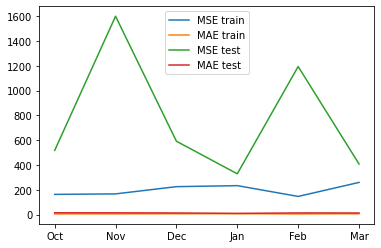

MSE_train [162.91, 166.93, 225.3, 233.49, 146.54, 259.49] avg: 199.11
MSE_test [517.3, 1599.85, 591.66, 328.94, 1194.25, 408.03] avg: 773.34
MAE_train [5.62, 5.75, 6.61, 7.04, 5.42, 6.73] avg: 6.2
MAE_test [14.75, 14.24, 13.03, 9.74, 13.33, 12.84] avg: 12.99


In [ ]:
evaluateNN(months_scaled,X_scaled,y_real_scaled,y_scaled=True,scaler=sc1)

#Observations:


In [ ]:
#Might be a good idea to see if we can prevent overfitting with augmentations

Xnp = np.array(X_scaled)
n = Xnp.shape[0]
X_aug=np.ones((1,50))
y_aug=np.ones(1)
indexes=[]
random.seed(0)
for i in range(10000):
    ind = random.randint(0,n)
    indexes.append(ind)
    y_aug=np.vstack((y_aug,y_real_scaled.iloc[ind]))
    x = Xnp[ind,:]
    x[:47]=x[:47]+np.random.normal(0,0.1,(47,))
    X_aug=np.vstack((X_aug,x))
X_aug=pd.DataFrame(X_aug[1:,:],columns=X.columns)
y_aug=pd.DataFrame(y_aug[1:,:])

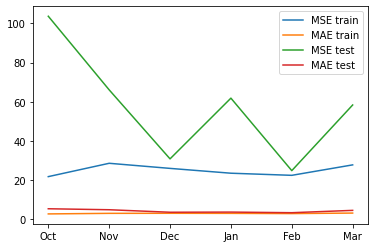

MSE_train [21.84, 28.64, 26.04, 23.58, 22.5, 27.83] avg: 25.07
MSE_test [103.6, 66.08, 30.89, 61.85, 24.89, 58.36] avg: 57.61
MAE_train [2.83, 3.12, 3.15, 3.11, 3.0, 3.26] avg: 3.08
MAE_test [5.46, 4.96, 3.68, 3.76, 3.45, 4.64] avg: 4.32


In [ ]:
# Concatenating new dataset with augmentations
X_new=pd.concat([X_scaled,X_aug])
y_new=pd.concat([y_real_scaled,y_aug])

evaluateNN(months_scaled,X_new,y_new,y_scaled=True,scaler=sc1,aug=True,X_original=X_scaled,y_original=y_real_scaled)

In [ ]:
# NGL, this is amazing

### Neural Network with last 5 hours prices as input

In [ ]:
X_time = X_scaled.copy()
y_time = y_real_scaled.copy()

for i in range(5):
    y_temp = y_real_scaled.squeeze().tolist()
    for j in range(i+1):
        y_temp.insert(0,0)
        y_temp.pop()
    X_time[str(-(i+1))]=pd.DataFrame(y_temp,index=y_real_scaled.index)

#Lets remove the first five entires now
X_time.drop(axis=0,labels=[i for i in range(24,29)],inplace=True)
y_time.drop(axis=0,labels=[i for i in range(24,29)],inplace=True)

In [ ]:
# Now lets augment like last time

X_time_aug=np.ones((1,55 ))
y_time_aug=np.ones(1)
n=X_time.shape[0]
indexes=[]
random.seed(0)
for i in range(10000):
    ind = random.randint(0,n-1)
    indexes.append(ind)

    x = np.array(X_time.iloc[ind])
    y_time_aug=np.vstack((y_time_aug,y_time.iloc[ind]))
    x[:47]=x[:47]+np.random.normal(0,0.1,(47,))
    X_time_aug=np.vstack((X_time_aug,x))
X_time_aug=pd.DataFrame(X_time_aug[1:,:],columns=X_time.columns)
y_time_aug=pd.DataFrame(y_time_aug[1:,:])

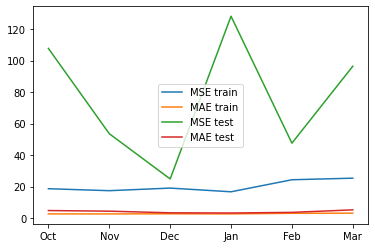

MSE_train [18.63, 17.38, 19.03, 16.68, 24.33, 25.33] avg: 20.23
MSE_test [107.76, 53.57, 24.84, 128.21, 47.58, 96.44] avg: 76.4
MAE_train [2.62, 2.62, 2.7, 2.64, 3.01, 3.1] avg: 2.78
MAE_test [4.76, 4.36, 3.32, 3.2, 3.59, 5.2] avg: 4.07


In [ ]:
X_time_new=pd.concat([X_time,X_time_aug])
y_time_new=pd.concat([y_time,y_time_aug])

evaluateNN(months_scaled,X_time_new,y_time_new,y_scaled=True,scaler=sc1,input_dim=55,aug=True,X_original=X_time,y_original=y_time) 
#definitely a good performance- better MAE on test but worse MSE on test

## Time Forecasting

### Utils

In [ ]:
from darts import TimeSeries
from darts.models.forecasting.rnn_model import RNNModel

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
#Modified helper functions for Time Series
months=[10,11,12,1,2,3]
months_scaled = X_scaled['month'].unique().tolist()

months_name=['Oct','Nov','Dec','Jan','Feb','Mar']

def evaluateTS(months,X_nts, X, y, y_scaled=False,scaler=None):
    months =months[:-1]
    
    if y_scaled:
        assert scaler is not None
    
    month_start=0
        
    MSE_train=[]
    MSE_test=[]
    MAE_train=[]
    MAE_test=[]
    
    for month in months:
        network = RNNModel(input_chunk_length=12,model='LSTM',hidden_dim=500,n_rnn_layers=2,training_length=24*4,
                          pl_trainer_kwargs={
                          "accelerator": "gpu",
                          "gpus": [0]
                            },)
        
        num_days_in_month = len(X_nts.index[abs(X_nts['month']-month)<=10e-3].tolist())

        month_start += num_days_in_month
    
        X_train, y_train, X_test, y_test = X[:month_start], y[:month_start], X[month_start:],y[month_start:]
        
        network.fit(series=y_train,future_covariates=X_train,epochs=5,verbose=False) #max_samples_per_ts=???
        
        y_pred=network.predict(n=4218-month_start,future_covariates=X).pd_dataframe()
       
        y_test = y_test.pd_dataframe()
        
        if y_scaled:
            y_test = scaler.inverse_transform(y_test)
            y_pred = scaler.inverse_transform(y_pred)
                

        MSE_test.append(round(mean_squared_error(y_test,y_pred),2))
        MAE_test.append(round(mean_absolute_error(y_test,y_pred),2))

        
    plt.plot(months_name[:-1],MSE_test,label='MSE test')
    plt.plot(months_name[:-1],MAE_test,label='MAE test')
    plt.legend()
    plt.show()
    print('MSE_test',MSE_test,'avg:', round(sum(MSE_test)/len(MSE_test),2))
    print('MAE_test',MAE_test,'avg:', round(sum(MAE_test)/len(MAE_test),2))

### Main

In [ ]:
X_ts, y_ts = X_scaled.copy(), y_real_scaled.copy()
X_ts['time_col']= range(1, len(X) + 1)
y_ts['time_col']= range(1, len(y_real) + 1)
X_TS = TimeSeries.from_dataframe(X_ts,time_col='time_col')
y_TS = TimeSeries.from_dataframe(y_ts,time_col='time_col')

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


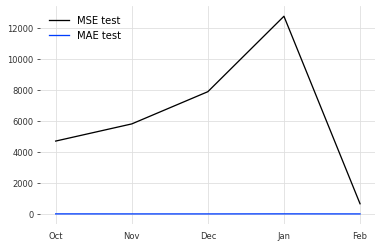

MSE_test [4712.63, 5819.85, 7898.89, 12765.91, 669.17] avg: 6373.29
MAE_test [15.96, 13.8, 13.42, 17.34, 13.61] avg: 14.83


In [ ]:
# Note that while we are still doing out of time testing, we are doing it a bit differently
# We now are adding months to our training set one by one or reducing the test set equivalently
evaluateTS(months,X,X_TS,y_TS,y_scaled=True,scaler=sc1)

In [ ]:
#Insights:
# 1. Note that the MSE and MAE cannot be compared as is with previous methods due the difference in train-testing procedure
# 2. February proves to be criticial yet again- where not training on Feb leads to very high test error on the same
# 3. The fact that the MSE keeps on rising till Feb indicates that our model keeps on overfitting more and more on our data
# 4. Need to regularize- augment like last time?